# Installing and Importing Libraries

This cell below is where we import all our libraries, modules and arguments

In [40]:
!pip install dash plotly
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import dash
from dash import dcc, html, State
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
!pip install seaborn
import seaborn as sns
#import json

# Mounting our drive

This is to connect colab with google drive, and mount the google drive, so we can have access to the dataset (churn.csv)

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
file_path = '/content/drive/MyDrive/churn.csv'
df = pd.read_csv('/content/drive/MyDrive/churn.csv')

# Displaying our data

This line of code display the first 11 rows in our dataset

In [43]:
df.head(11)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Understanding the data

We need to understand our data, by taking each column, analysing it and trying to understand how it affects the overall data.


the following code shows us the total number of people that churned and those who didn't in the Exited column.

In [44]:
# Frequency of classes in the "Exited" column
exit_counts = df["Exited"].value_counts()
exit_counts

,count
Exited,
0,7963
1,2037


Now we are manually assigning "1" to variable "churn" (those who are leavig the bank) and "0" to variable "not_churn (those who did not leave the bank)

In [45]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]
#churn.head()

In [46]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]
#not_churn.head()

Here we try to understand the relationship between how long they've been with the bank and how it influences the customers to leave or stay

In [47]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

,count
Tenure,
0,318
10,389
6,771
9,771
4,786
3,796
1,803
5,803
8,828


In [48]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

,count
Tenure,
0,95
10,101
7,177
6,196
8,197
2,201
4,203
5,209
3,213


We also try to understand if the number of products a customer subscribes to is a viable influence on the churn rate.

In [49]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

,count
NumOfProducts,
3,46
1,3675
2,4242


In [50]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

,count
NumOfProducts,
4,60
3,220
2,348
1,1409


We also tried to see the numer of those who had credit cards and those who didn't

In [51]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

,count
HasCrCard,
1,5631
0,2332


In [52]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

,count
HasCrCard,
1,1424
0,613


Being an active member of the bank or not might be an influence to people leaving or staying, so we tried to check that too.

In [53]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
1,4416
0,3547


In [54]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
0,1302
1,735


We also tried to understand if the geographical regions of the customers might also be a factor.

In [55]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

,count
Geography,
Spain,413
France,810
Germany,814


In [56]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

,count
Geography,
Germany,1695
Spain,2064
France,4204


we tried looking at the gender of the customers also


In [57]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

,count
Gender,
Male,4559
Female,3404


In [58]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

,count
Gender,
Female,1139
Male,898


In [59]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [60]:
# The size of the data set
df.shape

(10000, 14)

# Cleaning the data

Now we have to drop all columns that give no insights from the dataset such as Surname, Customer ID and Row number

In [61]:
# Drop irrelevant columns from the dataframe
data_cleaned = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Separate target variable from features
y = data_cleaned["Exited"]
X = data_cleaned.drop(columns=["Exited"])

# Define categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]
data_cleaned.head(11)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [62]:
# Creating a preprocessor that prepares the data for a machine learning model
# by applying different transformations to numerical and categorical cols.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

The code below basically just makes sure there are no missing values for eachcolumns

In [63]:
df.isna().sum()
#df = pd.DataFrame(data_cleaned)
#df.head()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [64]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Splitting the dataset

Now we proceed to splitt the dataset into training and testing subsets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Data transformation

The following lines of code transforms the data. `model_1` uses a logistic regression model, while `model_2` uses a random forest model.

In [66]:
model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=24))])

model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=24))])

The following code trains te models ('model_1' and 'model_2') using the training data, then uses the trained models to make predictions on the test dat a.

In [67]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

The following code calculates how well the models (Logistic Regressio, Random Forest Classifier) perform, then displays the report.

In [68]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
report_1 = classification_report(y_test, y_pred_1)

accuracy_2 = accuracy_score(y_test, y_pred_2)
report_2 = classification_report(y_test, y_pred_2)

print("Logistic Regression Model:")
print(accuracy_1)
print('Classification Report:')

# Convert the classification report to a DataFrame for tabulation
report_1_dict = classification_report(y_test, y_pred_1, output_dict=True)
report_1_df = pd.DataFrame(report_1_dict).transpose()
print(tabulate(report_1_df, headers='keys', tablefmt='grid'))

print("\nRandom Forest Classifier:")
print(accuracy_2)
print('Classification Report:')

# Convert the classification report to a DataFrame for tabulation
report_2_dict = classification_report(y_test, y_pred_2, output_dict=True)
report_2_df = pd.DataFrame(report_2_dict).transpose()
print(tabulate(report_2_df, headers='keys', tablefmt='grid'))

Logistic Regression Model:
0.8085
Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| 0            |    0.821581 | 0.969124 |   0.889274 | 1587      |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.617188 | 0.191283 |   0.292052 |  413      |
+--------------+-------------+----------+------------+-----------+
| accuracy     |    0.8085   | 0.8085   |   0.8085   |    0.8085 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.719384 | 0.580204 |   0.590663 | 2000      |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.779374 | 0.8085   |   0.765948 | 2000      |
+--------------+-------------+----------+------------+-----------+

Random Forest Classifier:
0.86
Classification Report:
+--------------+-

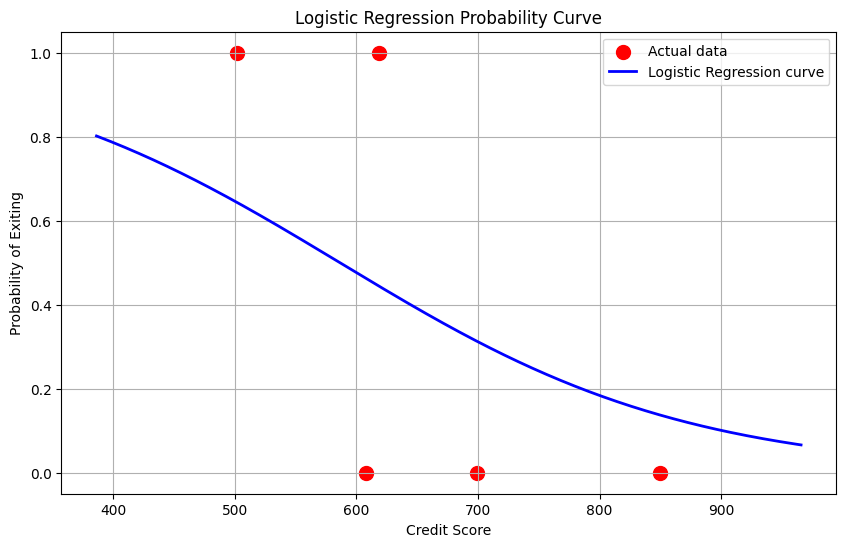

In [69]:
# Sample data
data = {
    'CreditScore': [619, 608, 502, 699, 850],
    'Exited': [1, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

X = df[['CreditScore']]
y = df['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_1 = LogisticRegression()
model_1.fit(X_scaled, y)

x_range = np.linspace(X_scaled.min() - 1, X_scaled.max() + 1, 300).reshape(-1, 1)

probabilities = model_1.predict_proba(x_range)[:, 1]

x_range_original = scaler.inverse_transform(x_range)

# Plot with adjustments
plt.figure(figsize=(10, 6))
plt.scatter(df['CreditScore'], df['Exited'], color='red', label='Actual data', s=100)
plt.plot(x_range_original, probabilities, color='blue', label='Logistic Regression curve', linewidth=2)
plt.xlabel('Credit Score')
plt.ylabel('Probability of Exiting')
plt.title('Logistic Regression Probability Curve')
plt.legend()
plt.grid(True)
plt.show()

The followin code initializes the confusion matrix for the Logistic Regression model and Random Forest model

In [70]:
# confusion matrix for the Logistic Regression model
cm = confusion_matrix(y_test, y_pred_1)

# and for the Random Forest model:
cm_2 = confusion_matrix(y_test, y_pred_2)

#print(cm)
#print(cm_2)

Confusio Matrix for Logistic regression model

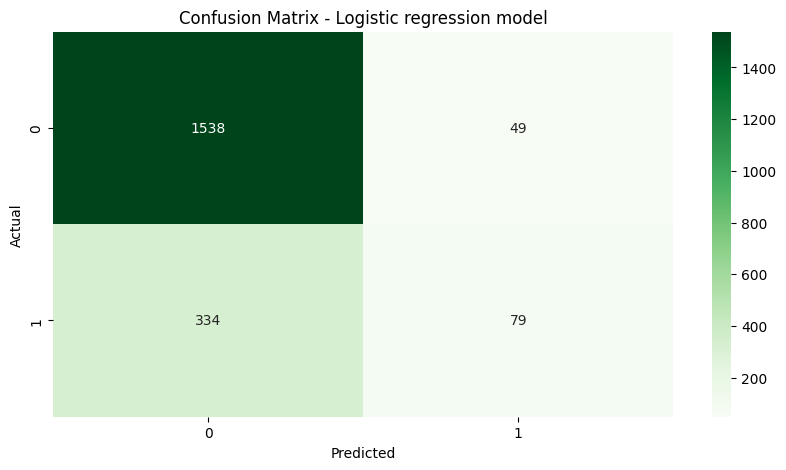

True Positive :  79
True Negative :  1538
False Positive:  49
False Negative:  334


In [71]:
# Plotting th e confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic regression model')
plt.show()

print("True Positive : ", cm[1, 1])
print("True Negative : ", cm[0, 0])
print("False Positive: ", cm[0, 1])
print("False Negative: ", cm[1, 0])

Confusion matrix for random forest model

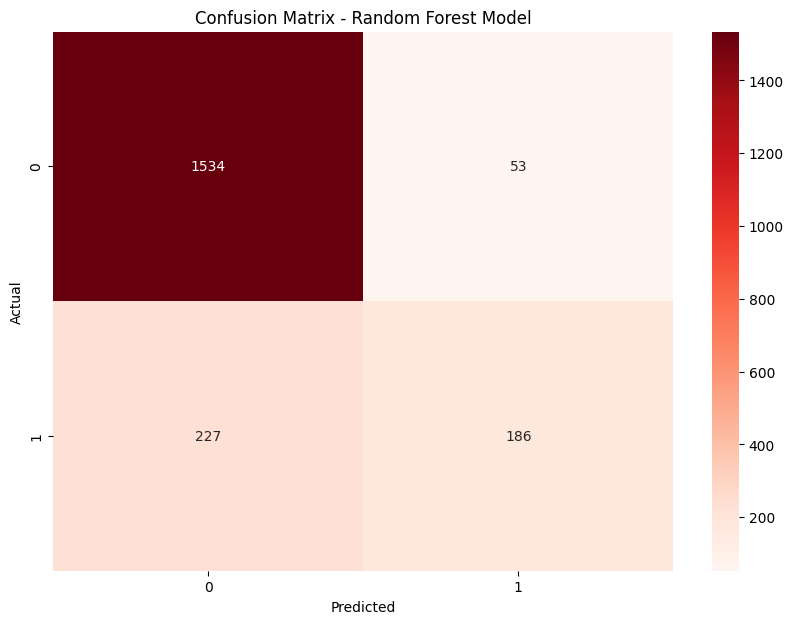

True Positive :  186
True Negative :  1534
False Positive:  53
False Negative:  227


In [72]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

print("True Positive : ", cm_2[1, 1])
print("True Negative : ", cm_2[0, 0])
print("False Positive: ", cm_2[0, 1])
print("False Negative: ", cm_2[1, 0])

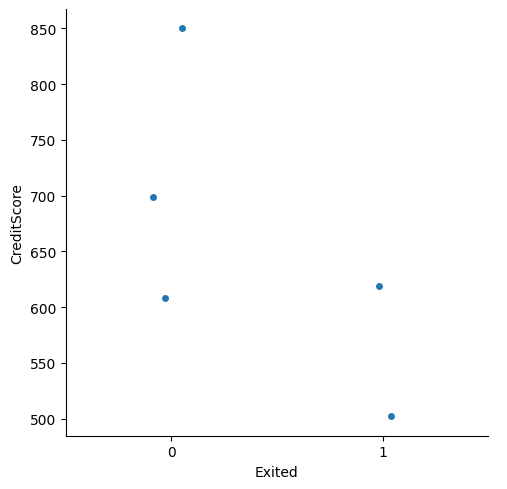

In [73]:
sns.catplot(x="Exited", y="CreditScore", data=df)

# Initializing Dash

To create the dash board we need to activate the dash app, which helps us create interactive web applications for data visualization

In [74]:
# Activating Dash app
app = dash.Dash(__name__)

# Creating and Styling Dashboard

The following codes basically just defines the layout of the dashboard using CSS (inline style), and then we employ callbacks for interaction with various parts of the dashboard.

In [75]:
# Sample Data
data = pd.read_csv('/content/drive/MyDrive/churn.csv')
data_cleaned = data.copy()

# Numeric Data for Correlation Heatmap and Model Training
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Dash App Initialization
#app = dash.Dash(__name__)

# App Layout
app.layout = html.Div(style={'backgroundColor': '#f2f2f2', 'fontFamily': 'Arial, sans-serif'}, children=[
    html.H1("Bank Customer Churn Dashboard", style={'textAlign': 'center', 'color': '#003366'}),

    # KPIs Section
    html.Div([
        html.Div([
            html.H3(id='kpi-churn-rate', style={'color': '#003366'}),
            html.P("Current Churn Rate", style={'color': '#003366'})
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Div([
            html.H3(id='kpi-clv', style={'color': '#003366'}),
            html.P("Customer Lifetime Value (Avg.)", style={'color': '#003366'})
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Div([
            html.H3(id='kpi-top-feature', style={'color': '#003366'}),
            html.P("Top Risk Feature", style={'color': '#003366'})
        ], style={'width': '30%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '20px', 'backgroundColor': '#ffffff', 'boxShadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'}),

    # Overall Churn Rate Pie Chart
    html.Div([
        html.H2("Overall Churn Rate", style={'color': '#003366'}),
        dcc.Graph(id='churn-rate')
    ], style={'padding': '25px', 'backgroundColor': '#ffffff', 'boxShadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'}),

    # Distribution Plots
    html.Div([
        html.H2("Distribution by Feature", style={'color': '#003366'}),
        dcc.Dropdown(
            id='feature-dropdown',
            options=[{'label': col, 'value': col} for col in ['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary']],
            value='Age',
            style={'marginBottom': '20px'}
        ),
        dcc.Graph(id='feature-distribution')
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'boxShadow': '3px 3px 5px rgba(0, 0, 0, 0.1)'}),

    # Correlation Heatmap
    html.Div([
        html.H2("Correlation Heatmap", style={'color': '#003366'}),
        dcc.Graph(id='correlation-heatmap')
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'boxShadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'}),

    # Feature Importance
    html.Div([
        html.H2("Feature Importance", style={'color': '#003366'}),
        dcc.Graph(id='feature-importance')
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'boxShadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'}),

    # Geomap
    html.Div([
        html.H2("Customer Distribution by Region", style={'color': '#003366'}),
        dcc.Graph(id='geomap')
    ], style={'padding': '20px', 'backgroundColor': '#ffffff', 'boxShadow': '2px 2px 5px rgba(0, 0, 0, 0.1)'}),
])

# Callback for Current Churn Rate
@app.callback(
    Output('kpi-churn-rate', 'children'),
    Input('churn-rate', 'figure')
)
def update_kpi_churn_rate(_):
    churn_rate = data['Exited'].mean() * 100
    return f"{churn_rate:.2f}%"

# Callback for Average Customer Lifetime Value (CLV)
@app.callback(
    Output('kpi-clv', 'children'),
    Input('feature-importance', 'figure')
)
def update_kpi_clv(_):
    clv_avg = data['EstimatedSalary'].mean()
    return f"${clv_avg:.2f}"

# Callback for Top Risk Feature
@app.callback(
    Output('kpi-top-feature', 'children'),
    Input('feature-importance', 'figure')
)
def update_kpi_top_feature(_):
    X = numeric_data.drop(columns=['Exited'])
    y = data['Exited']
    model = RandomForestClassifier(random_state=24)
    model.fit(X, y)
    importances = model.feature_importances_
    top_feature = X.columns[np.argmax(importances)]
    return top_feature

# Callback for Churn Rate Pie Chart
@app.callback(
    Output('churn-rate', 'figure'),
    Input('churn-rate', 'id')
)
def update_churn_rate(_):
    churn_rate = data['Exited'].mean() * 100
    fig = px.pie(
        names=['Retained', 'Exited'],
        values=[100-churn_rate, churn_rate],
        title=f'Overall Churn Rate: {churn_rate:.2f}%',
        hole=0.3
    )
    fig.update_traces(
        textinfo='value+percent',
        pull=[0, 0.1],
        marker=dict(colors=['#28a745', '#dc3545']),
        opacity=0.9,
        textposition='outside',
        hoverinfo='label+percent+name',
        rotation=90
    )
    fig.update_layout(
        showlegend=False,
        height=500,  # Increase height
        width=600,  # Increase width
        scene=dict(zaxis=dict(title='Churn', titlefont=dict(color='blue'))),
        paper_bgcolor="#f2f2f2",
        plot_bgcolor="#f2f2f2",
    )
    return fig

# Callback for Feature Distribution
@app.callback(
    Output('feature-distribution', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_feature_distribution(feature):
    aggregated_data = data.groupby([feature, 'Exited']).size().reset_index(name='Count')

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=aggregated_data[aggregated_data['Exited'] == 0][feature],
        y=aggregated_data[aggregated_data['Exited'] == 0]['Count'],
        name='Not Churned',
        marker_color='#1f77b4'
    ))

    fig.add_trace(go.Bar(
        x=aggregated_data[aggregated_data['Exited'] == 1][feature],
        y=aggregated_data[aggregated_data['Exited'] == 1]['Count'],
        name='Churned',
        marker_color='#ff7f0e'
    ))

    fig.update_layout(
        barmode='group',
        title=f'Distribution of {feature}',
        xaxis_title=feature,
        yaxis_title='Count',
        paper_bgcolor="#f2f2f2",
        plot_bgcolor="#f2f2f2",
        legend_title_text='Churn Status',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
    )

    return fig

# Callback for Correlation Heatmap
@app.callback(
    Output('correlation-heatmap', 'figure'),
    Input('correlation-heatmap', 'id')
)
def update_correlation_heatmap(_):
    corr = numeric_data.corr()
    fig = px.imshow(corr, text_auto=True, title="Feature Correlation Heatmap")
    fig.update_layout(
        margin=dict(l=0, r=0, t=30, b=0),
        paper_bgcolor="#f2f2f2",
        plot_bgcolor="#f2f2f2"
    )
    return fig

# Callback for Feature Importance
@app.callback(
    Output('feature-importance', 'figure'),
    Input('feature-importance', 'id')
)
def update_feature_importance(_):
    X = numeric_data.drop(columns=['Exited'])
    y = data['Exited']
    model = RandomForestClassifier(random_state=24)
    model.fit(X, y)
    importance = model.feature_importances_
    features = X.columns
    fig = go.Figure(data=[
        go.Bar(x=features, y=importance, marker=dict(color='rgb(58,200,225)', line=dict(color='rgb(8,48,107)', width=1.5)))
    ])
    fig.update_layout(
        title="Feature Importance",
        margin=dict(l=0, r=0, t=30, b=0),
        paper_bgcolor="#f2f2f2",
        plot_bgcolor="#f2f2f2",
        xaxis_title="Feature",
        yaxis_title="Importance"
    )
    return fig


# Callback for Geomap
@app.callback(
    Output('geomap', 'figure'),
    Input('geomap', 'id')
)
def update_geomap(_):
    fig = px.choropleth(
        data_cleaned,
        locations="Geography",  # Column with country names
        locationmode='country names',  # Tells Plotly to interpret the names as country names
        color="Exited",  # Colors regions based on this column
        color_continuous_scale="Viridis",
        title="Customer Distribution by Country",
        projection="orthographic"  # Classic map projection
    )

    # Update layout to make the map bigger and wider
    fig.update_layout(
        height=600,  # Increase height
        width=1000,  # Increase width
        margin={"r":0,"t":30,"l":0,"b":0},  # Remove default margins
        geo=dict(
            showframe=False,  # Hide the frame
            showcoastlines=True,  # Show coastlines for a classic look
            coastlinecolor="Black",  # Color of the coastlines
            showland=True,  # Show land
            landcolor="lightgreen",  # Land color for a classic look
            bgcolor="rgba(0,0,0,0)",  # Background color (transparent)
        ),
        paper_bgcolor="#f2f2f2",  # Background color of the paper
        plot_bgcolor="#f2f2f2"  # Background color of the plot
    )

    return fig




# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [76]:
#import json
#with open('/content/drive/MyDrive/europe_countries.geojson') as f:
 #   geojson_data = json.load(f)

#for feature in geojson_data['features']:
 #   print(feature['properties'])

# Prediction Dashboard


To make predictions on the probability of a customer leaving the bank, we made a different app for that


In [79]:
# Initialize the Dash app
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div(style={'backgroundColor': '#f9f9f9', 'fontFamily': 'Arial, sans-serif', 'padding': '50px'}, children=[
    html.H1("Customer Churn Prediction", style={'textAlign': 'center', 'color': '#2c3e50'}),

    html.Div([
        html.Label("Credit Score:", style={'color': '#2c3e50'}),
        dcc.Input(id='input-credit-score', type='number', placeholder="Enter Credit Score", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Geography:", style={'color': '#2c3e50'}),
        dcc.Dropdown(
            id='input-geography',
            # Check if 'Geography' column exists in the DataFrame, if not, handle it
            options=[{'label': geo, 'value': geo} for geo in df['Geography'].unique()] if 'Geography' in df.columns else [],
            placeholder="Select Geography",
            style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}
        ),

        html.Label("Gender:", style={'color': '#2c3e50'}),
        dcc.Dropdown(
            id='input-gender',
            options=[{'label': gender, 'value': gender} for gender in data['Gender'].unique()],
            placeholder="Select Gender",
            style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}
        ),

        html.Label("Age:", style={'color': '#2c3e50'}),
        dcc.Input(id='input-age', type='number', placeholder="Enter Age", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Balance:", style={'color': '#2c3e50'}),
        dcc.Input(id='input-balance', type='number', placeholder="Enter Balance", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Number of Products:", style={'color': '#2c3e50'}),
        dcc.Input(id='input-products', type='number', placeholder="Enter Number of Products", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Has Credit Card (1 = Yes, 0 = No):", style={'color': '#2c3e50'}),
        dcc.Input(id='input-credit-card', type='number', placeholder="Enter 1 or 0", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Is Active Member (1 = Yes, 0 = No):", style={'color': '#2c3e50'}),
        dcc.Input(id='input-active-member', type='number', placeholder="Enter 1 or 0", style={'width': '100%', 'padding': '10px', 'marginBottom': '20px'}),

        html.Label("Estimated Salary:", style={'color': '#2c3e50'}),
        dcc.Input(id='input-salary', type='number', placeholder="Enter Estimated Salary", style={'width': '100%', 'padding': '10px', 'marginBottom': '30px'}),

        html.Button('Predict', id='predict-button', n_clicks=0, style={'width': '100%', 'padding': '15px', 'backgroundColor': '#2980b9', 'color': 'white', 'fontSize': '18px'}),

        html.Div(id='prediction-result', style={'marginTop': '40px', 'textAlign': 'center', 'fontSize': '20px', 'color': '#34495e'}),
    ], style={'maxWidth': '500px', 'margin': 'auto', 'backgroundColor': '#ecf0f1', 'padding': '30px', 'borderRadius': '10px', 'boxShadow': '0px 0px 20px rgba(0, 0, 0, 0.1)'})
])

# Callback to update prediction result
# Callback to update prediction result
@app.callback(
    Output('prediction-result', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-credit-score', 'value'),
    State('input-geography', 'value'),
    State('input-gender', 'value'),
    State('input-age', 'value'),
    State('input-balance', 'value'),
    State('input-products', 'value'),
    State('input-credit-card', 'value'),
    State('input-active-member', 'value'),
    State('input-salary', 'value')
)
def predict_churn(n_clicks, credit_score, geography, gender, age, balance, products, credit_card, active_member, salary):
    if n_clicks > 0:
        # Check if all inputs are provided
        if None in [credit_score, geography, gender, age, balance, products, credit_card, active_member, salary]:
            return "Please fill in all fields."

        # Prepare input data for the model
        try:
            input_data = pd.DataFrame({
                'CreditScore': [credit_score],
                'Geography': [geography],
                'Gender': [gender],
                'Age': [age],
                'Balance': [balance],
                'NumOfProducts': [products],
                'HasCrCard': [credit_card],
                'IsActiveMember': [active_member],
                'EstimatedSalary': [salary]
            })

            # Ensure the input data is processed like the training data
            processed_data = preprocessor.transform(input_data)

            # Make prediction
            prediction = model.predict(processed_data)[0]
            result_text = "This customer is likely to churn." if prediction == 1 else "This customer is likely to stay."

        except Exception as e:
            return f"An error occurred: {str(e)}"

        return result_text

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

<IPython.core.display.Javascript object>